In [5]:
import pandas as pd
import requests
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import altair as alt


train = pd.read_csv('data/train.csv')

corrmatrix_titles = {"housing_median_age":"Median House Age", "total_rooms":"Total Rooms",
                        "total_bedrooms":"Total Bedrooms", "population":"Population", "households":"Households",
                        "median_income":"Median Income", "latitude":"Latitude", "longitude":"Longitude", "median_house_value":"Median House Value"}
corrMatrix = train.corr()
corrMatrix = corrMatrix.rename(columns = corrmatrix_titles)
corrMatrix = corrMatrix.rename(index = corrmatrix_titles)
corrMatrix = corrMatrix.reset_index()
corrMatrix = corrMatrix.melt(id_vars = 'index',
                        value_vars = corrMatrix['index'])

alt.Chart(corrMatrix).mark_rect().encode(
    alt.X('index:O', title = None),
    alt.Y('variable:O', title = None),
    alt.Color('value:Q', title = 'Correlation Value')).properties(
    width = 400, 
    height = 300, 
    title = "Correlation Heatmap")



alt.Chart(...)

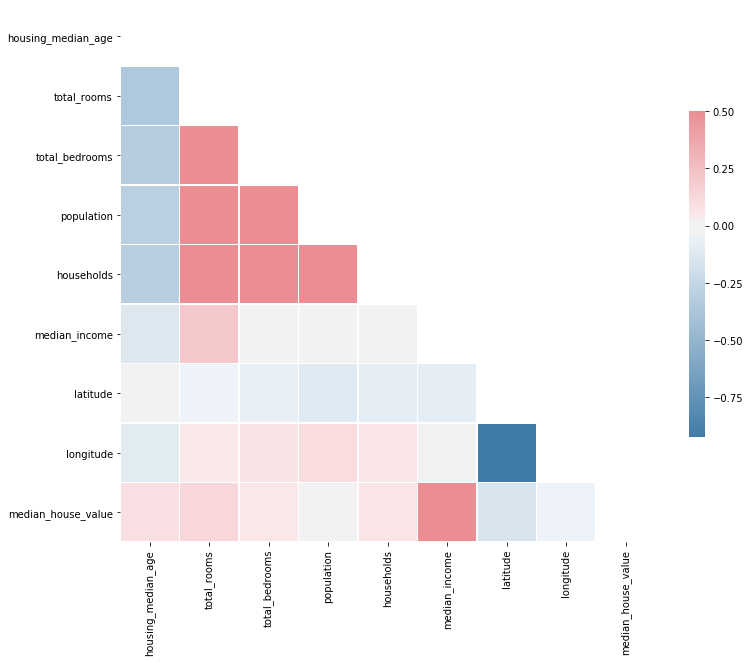

In [7]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corrMatrix = train.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))

# Create matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Create heatmap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Overlay mask on heat map
sns.heatmap(corrMatrix,
            mask=mask,
            cmap=cmap,
            vmax=0.5,
            center=0,
            square=True, 
            linewidths=.8,
            cbar_kws={"shrink": .5})
